In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset CIC Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (990755, 80)
X teste =  (424610, 80)
y multiclasse treino =  (990755,)
y multiclasse teste =  (424610,)
y binário treino =  (990755,)
y binário teste =  (424610,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[4.45000063e-04, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.94183389e-04, 9.10092010e-06, 1.37022903e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.18057941e-01, 2.27523003e-05, 2.39790081e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.08977515e-03, 0.00000000e+00, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.05141724e-04, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.66666690e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1008718    BENIGN
1092907    BENIGN
1034897       DoS
727692     BENIGN
1200733    BENIGN
            ...  
259178     BENIGN
1414414    BENIGN
131932     BENIGN
671155     BENIGN
121958     BENIGN
Name: Label_multiclass, Length: 990755, dtype: object
1008718    0
1092907    0
1034897    1
727692     0
1200733    0
          ..
259178     0
1414414    0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 990755, dtype: int64


In [8]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [9]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [10]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset CIC Test50

In [11]:
with open('df_cic_test50_with_preprocessing_getdummies_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [12]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1415365, 80)
y multiclasse =  (1415365,)
y binário =  (1415365,)


In [13]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [15]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [17]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [18]:
#X_test50.head()
X_test50

array([[4.90719986e-02, 9.10092010e-06, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75000025e-07, 4.55046005e-06, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48333354e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.23333351e-06, 4.55046005e-06, 6.85114517e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.92338306e-01, 2.73027603e-05, 2.05534355e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.54333369e-04, 0.00000000e+00, 3.42557258e-06, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['BENIGN' 'DoS' 'BENIGN' ... 'BENIGN' 'DoS' 'BENIGN']
[0 1 0 ... 0 1 0]


In [20]:
#X_test50.shape

In [21]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo LightBGM para Train e Validation - Train50

In [22]:
#!pip3 install lightgbm

In [23]:
import lightgbm as lgb

### Predição train50 binária

In [24]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [25]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [26]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [27]:
predict_train50_binary

array([1, 1, 0, ..., 1, 1, 0])

In [28]:
y_train50_binary_test

array([1, 1, 0, ..., 1, 1, 0])

In [29]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.999580791785403

### Visualização da árvore binária

In [30]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [31]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [32]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

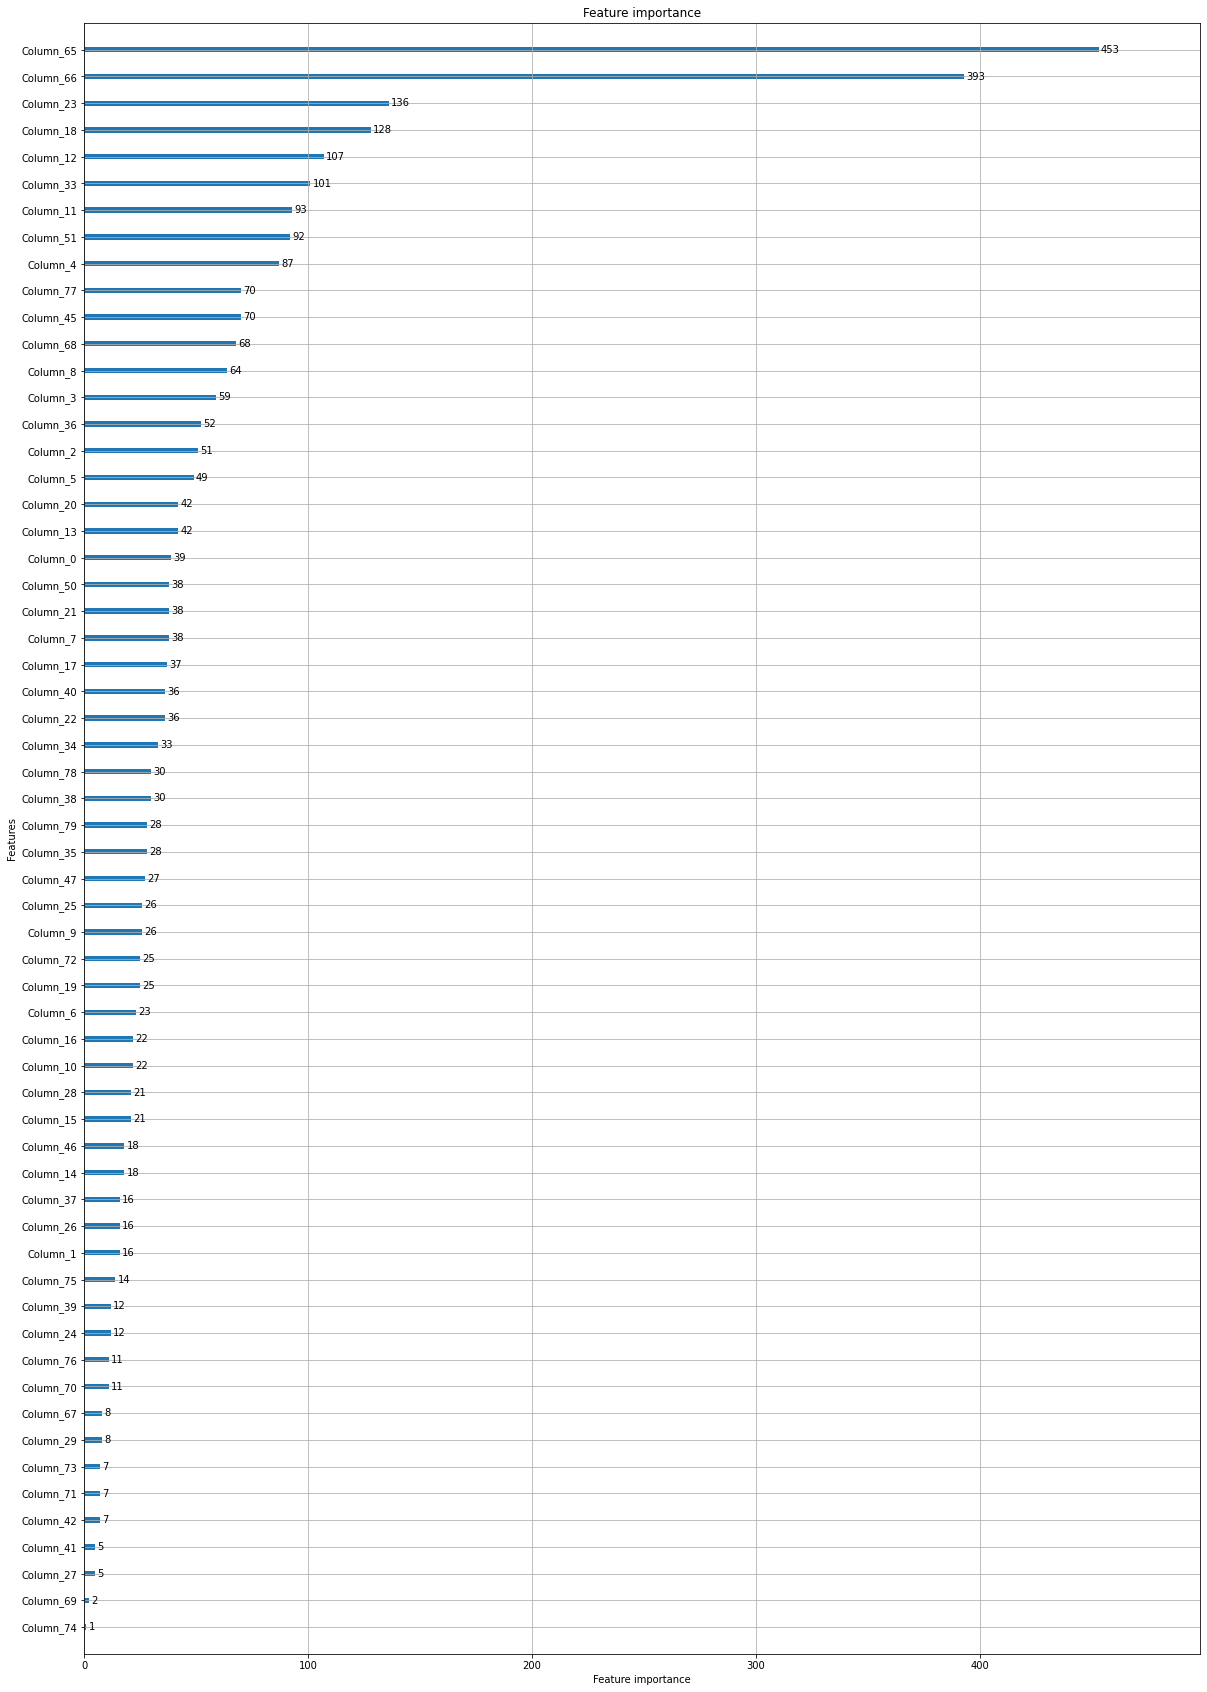

In [33]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [34]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [35]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [36]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [37]:
predict_train50_multiclass

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [38]:
y_train50_multiclass_test

array(['DoS', 'PortScan', 'BENIGN', ..., 'DoS', 'DoS', 'BENIGN'],
      dtype=object)

In [39]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9578295376934127

### Visualização da árvore multiclasse

In [40]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [41]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

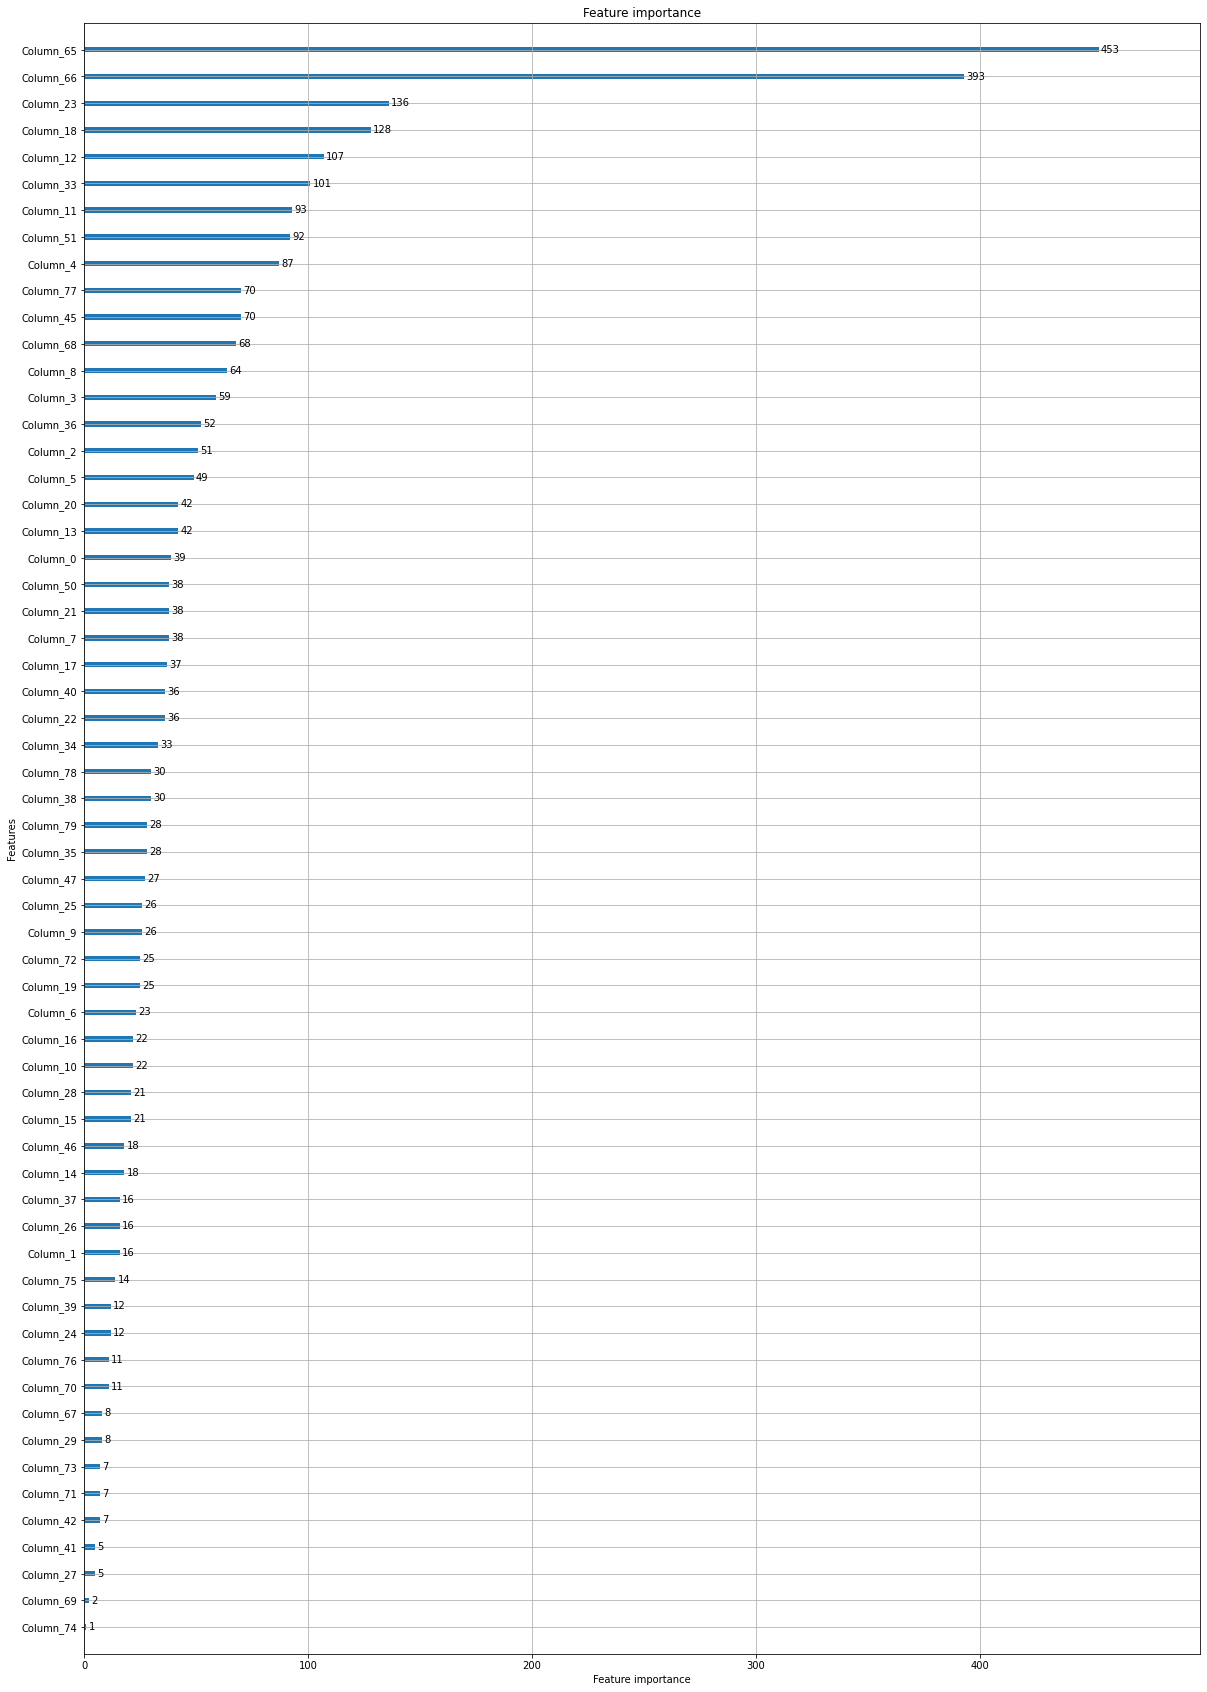

In [42]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [43]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [44]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999804  0.999675  0.999739    341041
           1   0.998672  0.999198  0.998935     83569

    accuracy                       0.999581    424610
   macro avg   0.999238  0.999436  0.999337    424610
weighted avg   0.999581  0.999581  0.999581    424610



In [45]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.986655  0.964042  0.975217    341041
      BotNet   0.000000  0.000000  0.000000       304
  BruteForce   0.780968  0.456814  0.576446      2084
        DDoS   0.938263  0.960544  0.949273     19034
         DoS   0.904663  0.922272  0.913383     37760
  Heartbleed   0.000000  1.000000  0.000000         0
Infiltration   0.000000  0.000000  0.000000         3
    PortScan   0.890763  0.983168  0.934687     24061
   WebAttack   0.621302  0.650155  0.635401       323

    accuracy                       0.957830    424610
   macro avg   0.569179  0.659666  0.553823    424610
weighted avg   0.969759  0.957830  0.963338    424610



### Cross Validation do train50

In [46]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [47]:
score_cv_train50_binary

array([0.99956599, 0.9994045 , 0.99946506, 0.99950543, 0.9995458 ,
       0.99955589, 0.99955589, 0.99957608, 0.99947515, 0.99955589])

In [48]:
cv_result_train50_binary

[0.9995205677650489]

In [49]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [50]:
score_cv_train50_multiclass

array([0.98616214, 0.9856272 , 0.99039121, 0.92949857, 0.94895838,
       0.14404239, 0.77784507, 0.80535958, 0.95976785, 0.98110522])

In [51]:
cv_result_train50_multiclass

[0.85087576014384]

### Matriz de Confusão do train50

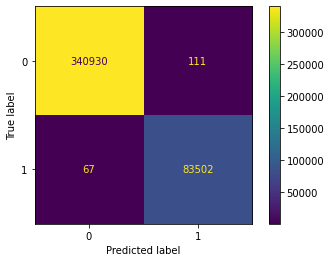

In [52]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

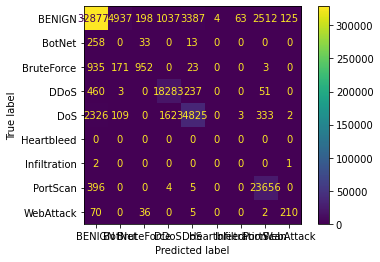

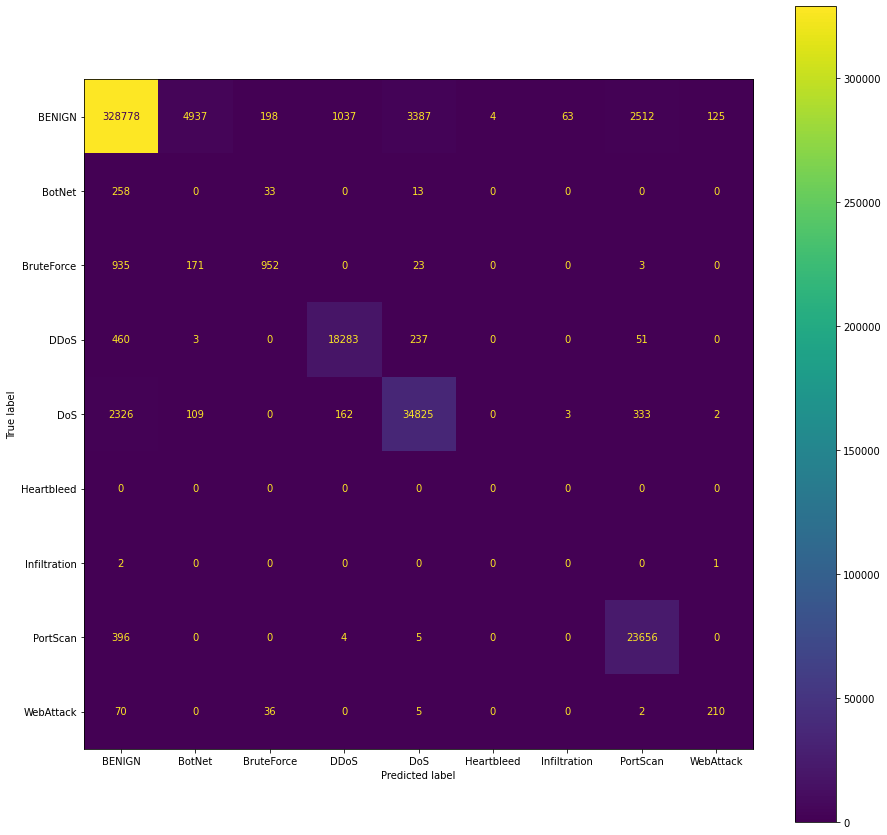

In [53]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [54]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [55]:
predict_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
y_test50_binary

array([0, 1, 0, ..., 0, 1, 0])

In [57]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9995951574328883

### Predição test50 multiclasse

In [58]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [59]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [60]:
y_test50_multiclass

array(['BENIGN', 'DoS', 'BENIGN', ..., 'BENIGN', 'DoS', 'BENIGN'],
      dtype=object)

In [61]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9574562038767385

### Precision e Recall do test50

In [62]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999828  0.999668  0.999748   1136548
           1   0.998649  0.999297  0.998973    278817

    accuracy                       0.999595   1415365
   macro avg   0.999238  0.999483  0.999360   1415365
weighted avg   0.999595  0.999595  0.999595   1415365



In [63]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.986557  0.963722  0.975006   1136548
      BotNet   0.000000  0.000000  0.000000       982
  BruteForce   0.765629  0.458580  0.573599      6917
        DDoS   0.936793  0.962242  0.949347     64013
         DoS   0.904887  0.920811  0.912780    126330
  Heartbleed   0.000000  0.000000  0.000000         5
Infiltration   0.000000  0.000000  0.000000        17
    PortScan   0.888640  0.981816  0.932907     79464
   WebAttack   0.595868  0.662075  0.627229      1089

    accuracy                       0.957456   1415365
   macro avg   0.564264  0.549916  0.552319   1415365
weighted avg   0.969439  0.957456  0.963007   1415365



### Matriz de Confusão do test50

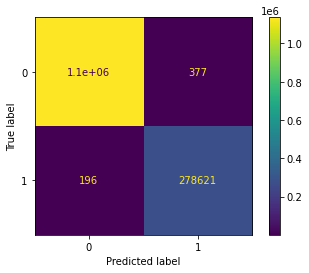

In [64]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

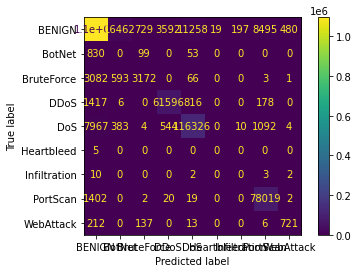

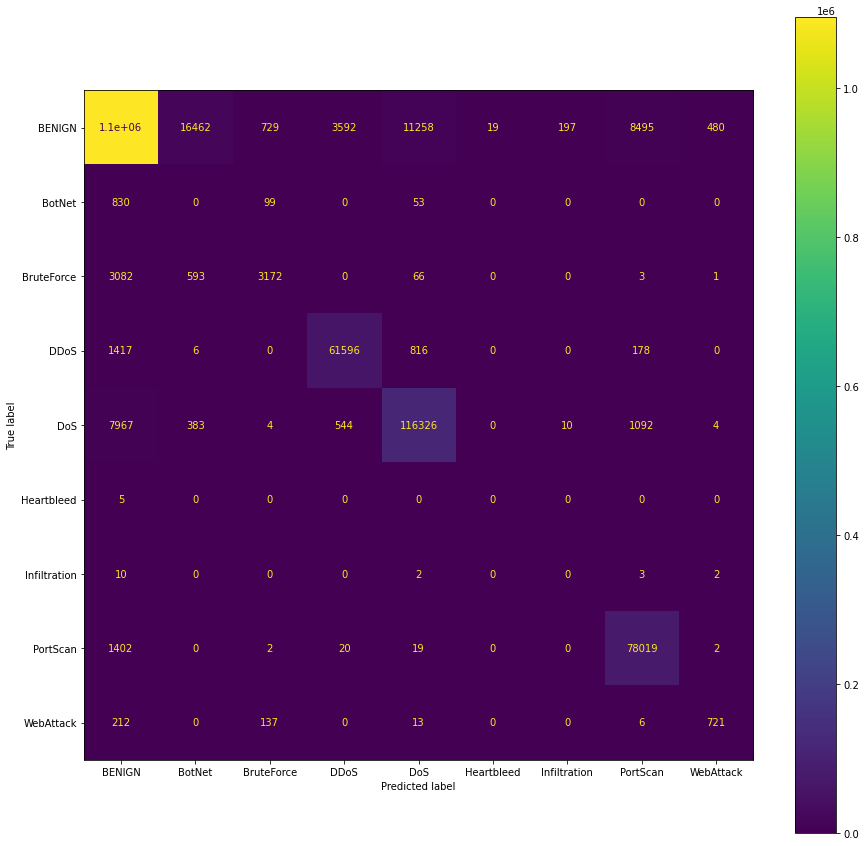

In [65]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)